In [68]:
# standard libraries
import importlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import linalg, stats, optimize
import time
import sys
sys.path.append('/Users/francescacrucinio/Documents/MD_LVM')

# import md_lvm
# importlib.reload(md_lvm)
import saem
importlib.reload(saem)

<module 'saem' from '/Users/francescacrucinio/Documents/MD_LVM/saem.py'>

In [2]:
nodes = 100
pi = np.array([0.6, 0.4])
probs = np.array([[0.25, 0.1], [0.1, 0.2]])

In [3]:
# def sbm_sample(pi, nu, nodes):
#     # block allocation
#     x = np.random.choice(np.arange(len(pi)), nodes, p=pi)
#     # adjacency matrix 
#     A = np.zeros((nodes, nodes))
#     for i in range(nodes):
#         A[i, np.delete(np.arange(nodes), i)] = np.random.binomial(1, p = probs[x[i], np.delete(x, i)], size = nodes-1)
#     return A, x

In [4]:
# y, res_z = sbm_sample(pi, probs, nodes)
# # y = np.loadtxt("adj.txt")

In [5]:
z = np.loadtxt("z.txt")
y = np.loadtxt("adj.txt")

In [6]:
th0 = np.array([0.5, 0.5, 0.5, 0.5, 0.5])  # Initial parameter guess.
X0 = np.random.binomial(1, 0.5, nodes)  # Initial particle cloud.

In [17]:
Niter = 1000
Nrep = 10
theta_saem_est = np.zeros((Nrep, 5))
ari_saem = np.zeros(Nrep)

In [18]:
for j in range(Nrep):
    z_iter = np.zeros([Niter, nodes])
    s1_iter = np.zeros(Niter)
    s2_iter = np.zeros((Niter, 4))
    s3_iter = np.zeros((Niter, 4))
    theta_saem = np.zeros((Niter, th0.size))
    n = 0
    z_iter[n, :] =  np.random.binomial(1, 0.5, size = nodes)
    theta_saem[n,:] = th0
    for n in range(1, Niter):
        # SAEM
        delta = 1/n
        z_iter[n, :] = saem.sbm_saem_proposal(y, z_iter[n-1, :], theta_saem[n-1,:])
        s1_update, s2_update, s3_update = saem.sbm_saem_sufficient_stat(z_iter[n, :], y)
        s1_iter[n] = s1_iter[n-1] + delta*(s1_update - s1_iter[n-1])
        s2_iter[n, :] = s2_iter[n-1, :] + delta*(s2_update - s2_iter[n-1, :])
        s3_iter[n, :] = s3_iter[n-1, :] + delta*(s3_update - s3_iter[n-1, :])
        theta_saem[n,:] = saem.sbm_saem_mle(s1_iter[n], s2_iter[n,:], s3_iter[n,:], nodes)
    ari_saem[j] = saem.sbm_ari(z-1, z_iter[-1,:])
    theta_saem_est[j, :] = theta_saem[-1,:]

In [23]:
ari_saem

array([0.80808081, 0.04808081, 0.88242424, 0.08080808, 0.15151515,
       0.84484848, 0.12080808, 0.88242424, 0.00969697, 0.96      ])

In [24]:
theta_saem_est

array([[0.52235235, 0.24241188, 0.10659667, 0.12017847, 0.19033174],
       [0.49735736, 0.18700613, 0.14722124, 0.17804002, 0.1511663 ],
       [0.55057057, 0.21835847, 0.12052075, 0.14070427, 0.17368625],
       [0.48401401, 0.14933016, 0.17290801, 0.15234367, 0.18609802],
       [0.56907908, 0.18926306, 0.14409372, 0.17033759, 0.14737406],
       [0.45630631, 0.2080211 , 0.10708965, 0.09697439, 0.24485372],
       [0.39755756, 0.14666264, 0.15117898, 0.15415886, 0.19140725],
       [0.48063063, 0.25297526, 0.10732535, 0.12272601, 0.18395738],
       [0.47236236, 0.16522785, 0.16526526, 0.16594903, 0.1664516 ],
       [0.53028028, 0.2470789 , 0.09866461, 0.11164198, 0.20137115]])

In [69]:
rse = np.zeros((Nrep, 5))
for j in range(Nrep):
    _, rse[j, :] = saem.se_sbm(theta_saem_est[j], pi, probs)

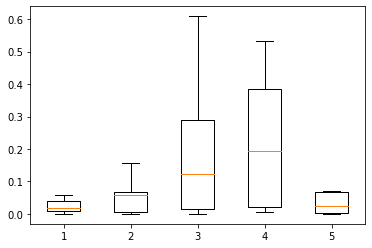

In [70]:
plt.boxplot(rse);